In [3]:
# Importing libraries

import torch
import matplotlib.pyplot as plt
import python.im_utils as im
import python.feature_transform as ft
import python.encoder_decoder as ed
import python.gmmot as ot

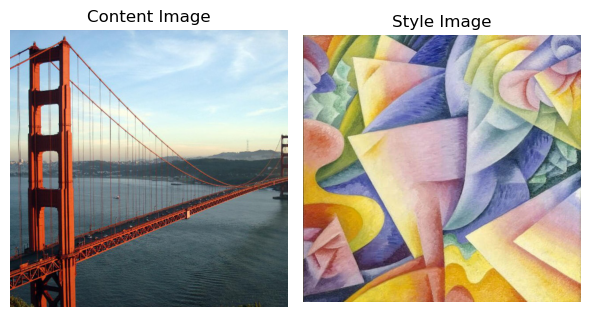

In [7]:
# Loading images

content_path = './inputs/contents/in4.jpg'
style_path = './inputs/styles/gino.jpg'
new_size = None

content = im.load_img(content_path, new_size)
style = im.load_img(style_path, new_size)

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
im.tensor_imshow(content, ax=axes[0])
axes[0].set_title("Content Image")
im.tensor_imshow(style, ax=axes[1])
axes[1].set_title("Style Image")
plt.tight_layout()
plt.show()

In [6]:
# Loading encoder and decoer

encoder = ed.Encoder(5)
decoder = ed.Decoder(5)

In [8]:
# Encoding images

fcontent = encoder(content.unsqueeze(0))[0]
fstyle = encoder(style.unsqueeze(0))[0]

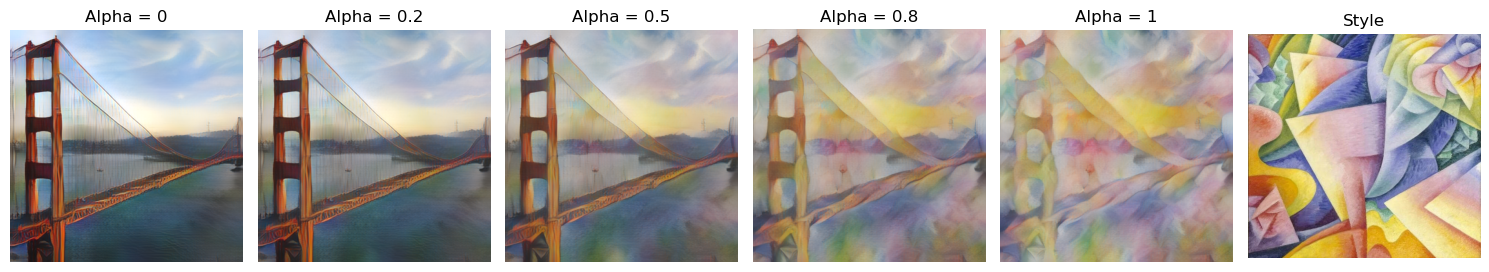

In [9]:
# Computing transformed features

gmmtfcontent, ClassesC, ProbaClassesC = ft.gmm_st(fcontent, fstyle, transport='rand')

# Plotting decoded image

im.alpha_show(gmmtfcontent, fcontent, decoder, style)
plt.show()